In [12]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score


## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/Mall_Customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
customers = pd.read_csv(file_content_stream)
# heart = heart.dropna()
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
## Creasting dummy gender 
customers['Gender_0_1'] = np.where(customers['Gender'] == 'Male', 1, 0)

scaler = MinMaxScaler()

## Transforming Age and Anual Income to 0-1 scale
customers[['Age_0_1', 'Annual_Income_0_1']] = scaler.fit_transform(customers[['Age', 'Annual Income (k$)']])
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_0_1,Age_0_1,Annual_Income_0_1
0,1,Male,19,15,39,1,0.019231,0.000000
1,2,Male,21,15,81,1,0.057692,0.000000
2,3,Female,20,16,6,0,0.038462,0.008197
3,4,Female,23,16,77,0,0.096154,0.008197
4,5,Female,31,17,40,0,0.250000,0.016393


In [14]:
## Defining the number of clusters to be considered
krange = list(range(2, 10))

## Defining the list to store results
CH_scores, DB_scores, silhouette_scores = list(), list(), list()

for i in krange:
    
    ## Defing the KMeans model 
    cluster_md = KMeans(n_clusters = i, n_init = 20).fit(customers[['Gender_0_1', 'Age_0_1', 'Annual_Income_0_1']])
    cluster_assignments = cluster_md.labels_
    
    ## Computing the CH, DB and silhouette scores
    CH_scores.append(calinski_harabasz_score(customers[['Gender_0_1', 'Age_0_1', 'Annual_Income_0_1']], cluster_assignments))
    DB_scores.append(davies_bouldin_score(customers[['Gender_0_1', 'Age_0_1', 'Annual_Income_0_1']], cluster_assignments))
    silhouette_scores.append(silhouette_score(customers[['Gender_0_1', 'Age_0_1', 'Annual_Income_0_1']], cluster_assignments))    

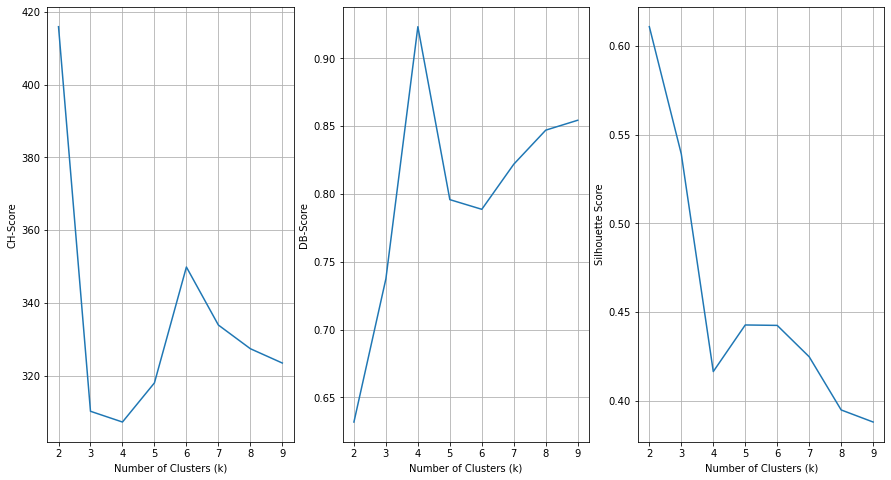

In [15]:
fig, axs = plt.subplots(1, 3, figsize = (15, 8))
axs[0].plot(krange, CH_scores)
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('CH-Score')
axs[0].grid()

axs[1].plot(krange, DB_scores)
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('DB-Score')
axs[1].grid()

axs[2].plot(krange, silhouette_scores)
axs[2].set_xlabel('Number of Clusters (k)')
axs[2].set_ylabel('Silhouette Score')
axs[2].grid()

In [16]:
## Clustering the data into two clusters 
kmeans_md = KMeans(n_clusters = 2, n_init = 20).fit(customers[['Gender_0_1', 'Age_0_1', 'Annual_Income_0_1']])

## Appending cluster labels 
customers['cluster'] = kmeans_md.labels_
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_0_1,Age_0_1,Annual_Income_0_1,cluster
0,1,Male,19,15,39,1,0.019231,0.000000,0
1,2,Male,21,15,81,1,0.057692,0.000000,0
2,3,Female,20,16,6,0,0.038462,0.008197,1
3,4,Female,23,16,77,0,0.096154,0.008197,1
4,5,Female,31,17,40,0,0.250000,0.016393,1


In [ ]:
## Cluster 0
cl